## HW 5 SGD for Multiclass Linear SVM
## Joby George (jg6615)
## Due 4/8/2022

## Bayesian Modeling

This section analyzes logistic regression in the Bayesian setting, where we introduce a prior $p(w)$ on  $w\in\mathbb{R}^{d}$. Consider a binary classification setting with input
space $\mathcal{X}=\mathbb{R}^{d}$, outcome space $\mathcal{Y}_{\pm}=\left\{ -1,1\right\} $,
and a dataset $\mathcal{D}=\left((x_{(1)},y_{(1)}),\ldots,(x_{(n)},y_{(n)})\right)$.

# Problem 1 Prompt

Give an expression for the posterior density p(w|D) in terms of negative log-likelihood function $NLL_D(w)$ and the prior density p(w) (up to a proportionality constant is fine).

## Problem 1 answer


By Bayes rule we can express the posterior density as:

$$p(w|D) = \frac{P(w \cap D)}{P(D)} $$

By chain rule we can re-express the numerator, giving us:


$$p(w|D) = \frac{P(D|w)*P(w)}{P(D)} $$

we can re-express P(D|w), the likelihood, as the $e^{NLL_D(w)}$,  and re-express the proportionality constant is the denominator $\frac{1}{P(D)}$ which we can express as K, giving us:

$$p(w|D) = K*e^{-NLL_D(w)}P(w) $$


### Q.E.D 



# Problem 2 Prompt 

Suppose we take a prior on $w$ of the form $w\sim\mathcal{N}(0,\Sigma)$, that is in the Gaussian family. Is this a conjugate prior to the likelihood given by logistic regression?

## Problem 2 Answer

We can start with Equation Three from Part 1 to understand whether the Gaussian Prior on our weight vector is a conjugate prior, replacing $\frac{1}{P(D)}$ with a constant K we see:

$$p(w|D) = K(-\sum_{i}^{n}y_{i} log(f((w^{T}x_{i}))+(1-y_{i})(log(1−f(w^{T}x_{i})))*P(w))$$

The posterior does not take the form of a Gaussian Distribution, and therefore the Gaussian Prior is not a conjugate prior to the likelihood given by logistic regression

### Q.E.D.

# Problem 3 Prompt

Show that there exist a covariance matrix $\Sigma$ such that MAP (maximum a posteriori) estimate for $w$
after observing data $\mathcal{D}$ is the same as the minimizer of the regularized
logistic regression function defined in Regularized Logistic Regression paragraph above, and give its value. 

Hint: Consider minimizing the negative log posterior of $w$. Also, remember you can drop any terms from the objective function that don't depend on $w$. You may freely use results of previous problems.

## Problem 3 Answer

Using the Hint and equation 5 from Question 1, we can state:

$$-log(p(w|D)) = -(log(K) + -NLL + log(P(w)) $$

Following the hint to disregard variables that do not depend on w, we see and applying the negative sign, we see:

$$-log(p(w|D)) = NLL - log(P(w)) $$

We know multivariate Gaussian distribution with $\mu$ =0 and $\Sigma$ = $\Sigma$ takes the form:

$$P(w) = \frac{e^{\frac{-1}{2}w^T\Sigma^{-1}}w}{\sqrt{(2\pi)^d\det{\Sigma}}}$$ 

Where the det stands for the determinant of $\Sigma$ and d represents the number of features 

When taking the log of this, we observe:

$$-logP(w) = - \frac{d}{2}log{(2\pi\det{\Sigma})} + w^T\Sigma^{-1}w$$ 

Additionally, we have proven in previous homework that our NLL is equivalent to the ERM of logistic regression with Hinge Loss, giving us:

$$argmax(-log(p(w|D))) = W_{map} =  \sum_i^{n}log(1 +e^{-y_i\theta^{T}x_i}) - \frac{d}{2}log{(2\pi\det{\Sigma})} + \frac{1}{2}w^T\Sigma^{-1}w $$

Furthermore we can eliminate the  $\frac{d}{2}log{(2\pi\det{\Sigma})}$ term as it does not rely on w giving us 

$$ W_{map} = \sum_i^{n}log(1 +e^{-y_i\theta^{T}x_i}) + \frac{1}{2}w^T\Sigma^{-1}w $$

The Empirical Risk Minimizer for Regularized Logistic Regression is 

$$ERM{L(w, \lambda)} = argmin \frac{1}{n}\sum_i^{n}log(1 +e^{-y_i\theta^{T}x_i}) + \lambda||w||^2$$

Therefore if:
$$\Sigma = \frac{1}{2n\lambda}I $$ we observe:

$$w_{MAP} = \sum_i^{n}log(1 +e^{-y_i\theta^{T}x_i}) + n\lambda||w||^2 $$

we can scale the whole side by $\frac{1}{n}$ and not alter our $W_{map}$ giving us:

$$w_{MAP} = \frac{1}{n}\sum_i^{n}log(1 +e^{-y_i\theta^{T}x_i}) + \lambda||w||^2 $$

which equals the ERM of Regularized Logistic Regression.

### Q.E.D



# Problem 4 Prompt

In the Bayesian approach, the prior should reflect your beliefs about the parameters before seeing the data and, in particular, should be independent on the eventual size of your dataset. Imagine choosing a prior distribution $w\sim\mathcal{N}(0,I)$. For a dataset $\mathcal{D}$ of size $n$, how should you choose $\lambda$ in our regularized
logistic regression objective function so that the ERM is equal to the mode of the posterior distribution of $w$ (i.e. is equal to the MAP estimator). 


## Problem 4 Answer
In this case our prior, has a covariance matrix that simply equals the identity matrix, we can observe:

$$ I = \frac{1}{2n\lambda}I $$

$$ 1 = \frac{1}{2n\lambda} $$
$$ \lambda = \frac{1}{2n} $$

### Q.E.D.

<div style="page-break-after: always;"></div>

## Coin Flipping with Partial Observability 
This is continuing your analysis done in HW4, you may use the results you obtained in HW4

Consider flipping a biased coin where $p(z=H\mid \theta_1) = \theta_1$. However, we cannot directly observe the result $z$. Instead, someone reports the result to us,which we denote by $x$.

Further, there is a chance that the result is reported incorrectly, if it's a head. Specifically, we have $p(x=H\mid z=H, \theta_2) = \theta_2$ and $p(x=T\mid z=T) = 1$.

# Problem 5 Prompt

We additionally obtained a set of clean results $\mathcal{D}_c$ of size $N_c$, where $x$ is directly observed without the reporter in the middle. 

Given that there are $c_h$ heads and $c_t$ tails, estimate $\theta_1$ and $\theta_2$ by MLE taking the two data sets into account. Note that the likelihood is $L(\theta_1, \theta_2) = p(\mathcal{D}_r, \mathcal{D}_c\mid \theta_1, \theta_2)$.

## Problem 5 Answer 

Since we know the true outcome of flips, the Maximum Likelihood of the probability of heads is simply the ratio of heads over total flips from $D_c$:

$$\theta_{1MLE} = \frac{c_h}{c_h+c_t}$$

In order to find $\theta_{2MLE}$ we have to examine the ratio of falsified heads (reported tails - true tails) to total number of true heads, giving us.

$$\theta_{2MLE} = \frac{d_t-c_t}{c_h}$$


### Q.E.D

# Problem 6 Prompt

Since the clean results are expensive, we only have a small number of those and we are worried that we may over fit the data.

To mitigate over fitting we can use a prior distribution on $\theta_1$ if available. Let's imagine that an oracle gave use the prior $p(\theta_1) = \beta(h, t)$.

Derive the MAP estimates for $\theta_1$ and $\theta_2$.

## Problem 6 answer

$$P(\theta_1|D_c)  \space \alpha  \space P(D_c |\theta_1)P(\theta_1) $$

This equals
$$(P(\theta_1|D_c))\space \alpha \space \theta_1^{c_h}*(1-\theta_1)^{c_t}*\theta_1^h*(1-\theta_1)^t$$

$$P(\theta_1|D_c)) \space \alpha \space \theta_1^{c_h + h}*(1-\theta_1)^{c_t+t} $$
$$\theta_{1MAP} = mode(\beta(c_h+h,c_t+t)) $$

<div style="page-break-after: always;"></div>

## Derivation for multi-class modeling

Suppose our output space and our action space are given as follows:

$\mathcal{Y}=\mathcal{A}=\left\{ 1,\ldots,k\right\} $. 


Given a non-negative class-sensitive loss function 
$$\Delta:\mathcal{Y}\times\mathcal{A}\to[0,\infty)$$ 

and a class-sensitive feature mapping 
$$\Psi:\mathcal{X}\times\mathcal{Y}\to\mathbb{R}^{d}$$

Our prediction is
function $f:\mathcal{X}\to\mathcal{Y}$ is given by


$$f_{w}(x)=argmax_{y\in\mathcal{Y}}\left\langle w,\Psi(x,y)\right\rangle$$

For training data $(x_{1},y_{1}),\ldots,(x_{n},y_{n})\in\mathcal{X}\times\mathcal{Y}$, let $J(w)$ be the $\ell_{2}$-regularized empirical risk function for the multiclass hinge loss. We can write this as

\[
J(w)=\lambda\|w\|^{2}+\frac{1}{n}\sum_{i=1}^{n}\max_{y\in\mathcal{Y}}\left[\Delta\left(y_{i},y\right)+\left\langle w,\Psi(x_{i},y)-\Psi(x_{i},y_{i})\right\rangle \right]
\]
for some $\lambda>0$.

# Problem 7 Prompt

Show that $J(w)$ is a convex function of $w$. You may use any of the rules about convex functions described in our [notes on convex optimatzion](https://davidrosenberg.github.io/mlcourse/Notes/convex-optimization.pdf),
in previous assignments, or in the Boyd and Vandenberghe book, though you should cite the general facts you are using. 


Hint: If $f_{1},\ldots,f_{m}:\mathbb{R}^{n}\to\mathbb{R}$
are convex, then their point wise maximum $f(x)=\max\left\{ f_{1}(x),\ldots,f_{m}(x)\right\} $
is also convex.

## Problem 7 Answer

# Problem 8 Prompt

Since $J(w)$ is convex, it has a subgradient at every point. Give an expression for a subgradient of $J(w)$. You may use any standard results about subgradients, including the result from an earlier homework
about subgradients of the pointwise maxima of functions. 

Hint: It may be helpful to refer to $\hat{y}_{i}=argmax_{y\in\mathcal{Y}}\left[\Delta\left(y_{i},y\right)+\left\langle w,\Psi(x_{i},y)-\Psi(x_{i},y_{i})\right\rangle \right]$.

## Problem 8 Answer

# Problem 9 Prompt

Give an expression for the stochastic subgradient based on the point $(x_{i},y_{i})$.

## Problem 9 answer

# Problem 10 Prompt

Give an expression for a minibatch subgradient, based on the points $(x_{i},y_{i}),\ldots,\left(x_{i+m-1},y_{i+m-1}\right)$.

## Problem 10 Answer

<div style="page-break-after: always;"></div>

## Optional Problem: Hinge Loss is a special Case of Generalized Hinge Loss

Let $\mathcal{Y}=\left\{ -1,1\right\} $. Let $\Delta(y,\hat{y})=1({y\neq\hat{y}}).$

If $g(x)$ is the score function in our binary classification setting, then define our compatibility function as 
\begin{eqnarray*}
h(x,1) & = & g(x)/2\\
h(x,-1) & = & -g(x)/2.
\end{eqnarray*}
Show that for this choice of $h$, the multiclass hinge loss reduces
to hinge loss: 
\[
\ell\left(h,\left(x,y\right)\right)=\max_{y'\in\mathcal{Y}}\left[\Delta\left(y,y')\right)+h(x,y')-h(x,y)\right]=\max\left\{ 0,1-yg(x)\right\} 
\]

## Answer

<div style="page-break-after: always;"></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
try:
    from sklearn.datasets.samples_generator import make_blobs
except:
    from sklearn.datasets import make_blobs

%matplotlib inline

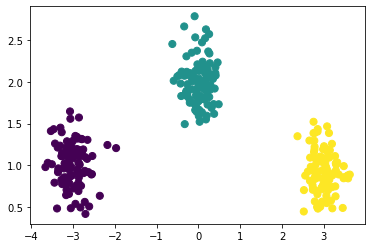

In [5]:
# Create the  training data
np.random.seed(2)
X, y = make_blobs(n_samples=300,cluster_std=.25, centers=np.array([(-3,1),(0,2),(3,1)]))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

## Implementation

In this problem we will work on a simple three-class classification example. The data is generated and plotted for you in the skeleton code.

## One-vs-All (also known as One-vs-Rest)

First we will implement one-vs-all multiclass classification. Our approach will assume we have a binary base classifier that returns a score, and we will predict the class that has the highest score.

# Problem 11 Prompt

Complete the methods fit, decision function and predict from OneVsAllClassifier in the skeleton code. Following the OneVsAllClassifier code is a cell that extracts the results of the fit and plots the decision region. You can have a look at it first to make sure you understand how the class will be used.
 
 ## Problem 11 Answer
 
 done below
 

In [12]:
from sklearn.base import BaseEstimator, ClassifierMixin, clone

class OneVsAllClassifier(BaseEstimator, ClassifierMixin):  
    """
    One-vs-all classifier
    We assume that the classes will be the integers 0,..,(n_classes-1).
    We assume that the estimator provided to the class, after fitting, has a "decision_function" that 
    returns the score for the positive class.
    """
    def __init__(self, estimator, n_classes):      
        """
        Constructed with the number of classes and an estimator (e.g. an
        SVM estimator from sklearn)
        @param estimator : binary base classifier used
        @param n_classes : number of classes
        """
        self.n_classes = n_classes 
        self.estimators = [clone(estimator) for _ in range(n_classes)]
        self.fitted = False

    def fit(self, X, y=None):
        """
        This should fit one classifier for each class.
        self.estimators[i] should be fit on class i vs rest
        @param X: array-like, shape = [n_samples,n_features], input data
        @param y: array-like, shape = [n_samples,] class labels
        @return returns self
        """
        #initialize a dictionary for each class
        label_dict = {}
        #for each class, create a np array with length n, that takes value 1 if y equals that class, 0 otherwise
        for pred_class in range(self.n_classes):
            label_dict[pred_class] = np.where(y==pred_class,1,0)
        #evaluate the SVM's fit method on our training data, for each class using a binary class
        for i in range(self.n_classes):
            self.estimators[i].fit(X,label_dict[i])
        self.fitted = True  
        return self   

    def decision_function(self, X):
        """
        Returns the score of each input for each class. Assumes
        that the given estimator also implements the decision_function method (which sklearn SVMs do), 
        and that fit has been called.
        @param X : array-like, shape = [n_samples, n_features] input data
        @return array-like, shape = [n_samples, n_classes]
        """
        if not self.fitted:
            raise RuntimeError("You must train classifer before predicting data.")

        if not hasattr(self.estimators[0], "decision_function"):
            raise AttributeError(
                "Base estimator doesn't have a decision_function attribute.")
        
        #Replace the following return statement with your code
        
        #Initialize a n_samples by n_classes matrix full of zeros
        score = np.zeros([X.shape[0],self.n_classes])
        
        #for each column, apply SVM decision function
        for i in range(self.n_classes):
            score[:,i] = self.estimators[i].decision_function(X)
        
        return score
    
    def predict(self, X):
        """
        Predict the class with the highest score.
        @param X: array-like, shape = [n_samples,n_features] input data
        @returns array-like, shape = [n_samples,] the predicted classes for each input
        """
        #Replace the following return statement with your code
        
        #calculate the score to get probabilities for each class by running one vs all decision function on x
        score = self.decision_function(X)
        
        return np.zeros(X.shape[0])

 

Coeffs 0
[[-1.05854248 -0.90296099]]
Coeffs 1
[[0.20993215 0.53516979]]
Coeffs 2
[[ 0.89163053 -0.82602014]]


/Users/jobygeorge/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array([[100,   0,   0],
       [100,   0,   0],
       [100,   0,   0]])

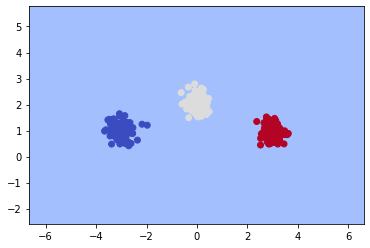

In [13]:
#Here we test the OneVsAllClassifier
from sklearn import svm
svm_estimator = svm.LinearSVC(loss='hinge', fit_intercept=False, C=200)
clf_onevsall = OneVsAllClassifier(svm_estimator, n_classes=3)
clf_onevsall.fit(X,y)

for i in range(3) :
    print("Coeffs %d"%i)
    print(clf_onevsall.estimators[i].coef_) #Will fail if you haven't implemented fit yet

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = min(X[:,0])-3,max(X[:,0])+3
y_min, y_max = min(X[:,1])-3,max(X[:,1])+3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
mesh_input = np.c_[xx.ravel(), yy.ravel()]

Z = clf_onevsall.predict(mesh_input)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)


from sklearn import metrics
metrics.confusion_matrix(y, clf_onevsall.predict(X))

# Problem 12 Prompt

Include the results of the test cell in your submission.

## Problem 12 Answer

done below

<div style="page-break-after: always;"></div>

## Multiclass SVM

In this question, we will implement stochastic subgradient descent for the linear multiclass SVM, as described in class and in this problem set. We will use the class-sensitive feature mapping approach with the “multivector construction”, as described in the multiclass lecture.

# Problem 13 Prompt

Complete the function featureMap in the skeleton code.

## Problem 13 Answer

Done Below

# Problem 14 Prompt

Complete the function sgd.

## Problem 14 Answer

Done Below

# Problem 15 Prompt

Complete the methods subgradient, decision function and predict from the class MulticlassSVM.
 
## Problem 15 Answer

Done Below

# Problem 16 Prompt

Following the multiclass SVM implementation, we have included another block of test code. Make sure to include the results from these tests in your assignment, along with your code.

## Problem 16 Answer

Done below